In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading in the food price data for Rwanda (https://data.humdata.org/dataset/a4a84c1c-81d1-491b-9fbe-1955ae736508/resource/8c22eeb5-cc2e-46bc-8a0d-08b7486b2486/download/wfp_food_prices_rwa.csv)
df = pd.read_csv('data/wfp_food_prices_rwa.csv')

df.head()

C:\Users\jnyirimana\AppData\Local\Temp\ipykernel_29848\1773098319.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/wfp_food_prices_rwa.csv')


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,Kigali City,Nyarugenge,Kigali,-1.9536111,30.0605556,cereals and tubers,Maize,KG,actual,Wholesale,RWF,206.11,0.1968
2,2000-01-15,Kigali City,Nyarugenge,Kigali,-1.9536111,30.0605556,pulses and nuts,Beans,KG,actual,Wholesale,RWF,108.02,0.1031
3,2000-02-15,Kigali City,Nyarugenge,Kigali,-1.9536111,30.0605556,cereals and tubers,Maize,KG,actual,Wholesale,RWF,152.66,0.1457
4,2000-02-15,Kigali City,Nyarugenge,Kigali,-1.9536111,30.0605556,pulses and nuts,Beans,KG,actual,Wholesale,RWF,110.22,0.1052


In [3]:
# shape of the whole csv file
df.shape

(140007, 14)

- Useful columns:
    * date: the date the price was recorded, looks to be monthly
    * market: the name of the market 
    * category: food categories
    * commodity: food items
    * Unit: the unit bieng sold
    * pricetype: Wholesale or retail
    * price: price of the commodity in RWF
    * usdprice: the USD price of the commodity

In [4]:
# skip the second row as it's more of less the same as the title
df = pd.read_csv('data/wfp_food_prices_rwa.csv', skiprows = [1])
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2000-01-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.060556,cereals and tubers,Maize,KG,actual,Wholesale,RWF,206.11,0.1968
1,2000-01-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.060556,pulses and nuts,Beans,KG,actual,Wholesale,RWF,108.02,0.1031
2,2000-02-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.060556,cereals and tubers,Maize,KG,actual,Wholesale,RWF,152.66,0.1457
3,2000-02-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.060556,pulses and nuts,Beans,KG,actual,Wholesale,RWF,110.22,0.1052
4,2000-03-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.060556,cereals and tubers,Maize,KG,actual,Wholesale,RWF,159.27,0.1520


In [5]:
df.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
140001,2022-10-15,Western Province,Karongi,Mubuga,-2.137459,29.313643,cereals and tubers,Rice (local),KG,aggregate,Retail,RWF,1183.33,1.1296
140002,2022-10-15,Western Province,Karongi,Mubuga,-2.137459,29.313643,cereals and tubers,"Rice (long grain, high quality, local)",KG,aggregate,Retail,RWF,1300.00,1.2410
140003,2022-10-15,Western Province,Karongi,Mubuga,-2.137459,29.313643,miscellaneous food,Salt,KG,aggregate,Retail,RWF,416.67,0.3977
140004,2022-10-15,Western Province,Karongi,Mubuga,-2.137459,29.313643,oil and fats,Oil,L,aggregate,Retail,RWF,3933.33,3.7547
140005,2022-10-15,Western Province,Karongi,Mubuga,-2.137459,29.313643,pulses and nuts,Beans (dry),KG,aggregate,Retail,RWF,1008.33,0.9626


In [6]:
# checking if columns have the right datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140006 entries, 0 to 140005
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       140006 non-null  object 
 1   admin1     140006 non-null  object 
 2   admin2     140006 non-null  object 
 3   market     140006 non-null  object 
 4   latitude   140006 non-null  float64
 5   longitude  140006 non-null  float64
 6   category   140006 non-null  object 
 7   commodity  140006 non-null  object 
 8   unit       140006 non-null  object 
 9   priceflag  140006 non-null  object 
 10  pricetype  140006 non-null  object 
 11  currency   140006 non-null  object 
 12  price      140006 non-null  float64
 13  usdprice   140006 non-null  float64
dtypes: float64(4), object(10)
memory usage: 15.0+ MB


In [7]:
# filtering for markets containing camps
df = df[df['market'].str.contains("Camp")]

In [8]:
# shape of the data after filtering for prices in refugee camps only
df.shape

(5605, 14)

In [9]:
# converting the date column in the right format
df['date'] = pd.to_datetime(df.date)

In [10]:
# cheking for missing values
df.isnull().sum()
# none so that is good

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [20]:
# descriptive stats on the numeric columns
df.describe()

,latitude,longitude,price,usdprice
count,4581.000000,4581.000000,4581.000000,4581.000000
mean,-2.218715,29.935658,725.189260,0.692262
std,0.387043,0.507853,685.097558,0.653996
min,-2.674956,29.355169,50.000000,0.047700
25%,-2.482604,29.522728,250.000000,0.238600
50%,-2.306839,29.849607,425.000000,0.405700
75%,-2.129810,30.259304,957.140000,0.913700
max,-1.595355,30.839392,3875.000000,3.699100


In [12]:
# descriptive stats on the non-numeric columns
df.describe(exclude=np.number)

C:\Users\jnyirimana\AppData\Local\Temp\ipykernel_29848\2303470019.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number)


,date,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency
count,5605,5605,5605,5605,5605,5605,5605,5605,5605,5605
unique,75,4,6,6,6,22,2,2,1,1
top,2019-10-15 00:00:00,Southern Province,Gatsibo,Nyabiheke (Camp),cereals and tubers,Sugar,KG,actual,Retail,RWF
freq,113,1839,1049,1049,2791,365,5040,5396,5605,5605
first,2016-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# how many camps do we in the dataset? 6
df.market.unique()

array(['Gihembe (Camp)', 'Nyabiheke (Camp)', 'Kigeme (Camp)',
       'Mugombwa (Camp)', 'Kiziba (Camp)', 'Mahama (Camp)'], dtype=object)

In [22]:
# value_counts of category column
df.category.value_counts()

cereals and tubers       2791
vegetables and fruits     869
miscellaneous food        623
oil and fats              565
meat, fish and eggs       495
pulses and nuts           262
Name: category, dtype: int64

In [24]:
# value_counts of commodity column
df.commodity.value_counts()

Sugar                                     365
Potatoes (Irish)                          360
Cassava flour                             358
Bananas                                   341
Fish (dry)                                338
Oil (palm)                                322
Potatoes                                  319
Sorghum                                   286
Cabbage                                   281
Cassava                                   281
Beans (dry)                               262
Salt                                      258
Maize                                     254
Cassava leaves                            247
Oil                                       243
Rice (local)                              228
Rice (imported)                           218
Maize flour                               210
Meat (beef)                               157
Rice (long grain, high quality, local)    147
Maize flour (imported)                    117
Rice (imported, Tanzanian)        

In [30]:
# unique commodities in the dataset
df.commodity.unique()

array(['Cassava', 'Cassava flour', 'Maize', 'Potatoes',
       'Potatoes (Irish)', 'Rice (imported)', 'Rice (local)', 'Sorghum',
       'Fish (dry)', 'Meat (beef)', 'Salt', 'Sugar', 'Oil', 'Oil (palm)',
       'Beans (dry)', 'Bananas', 'Cassava leaves', 'Maize flour',
       'Maize flour (imported)', 'Cabbage',
       'Rice (long grain, high quality, local)',
       'Rice (imported, Tanzanian)'], dtype=object)

In [14]:
# value_counts of the priceflag column
df.priceflag.value_counts()

actual       5396
aggregate     209
Name: priceflag, dtype: int64

### A map showing refugee camps in Rwanda
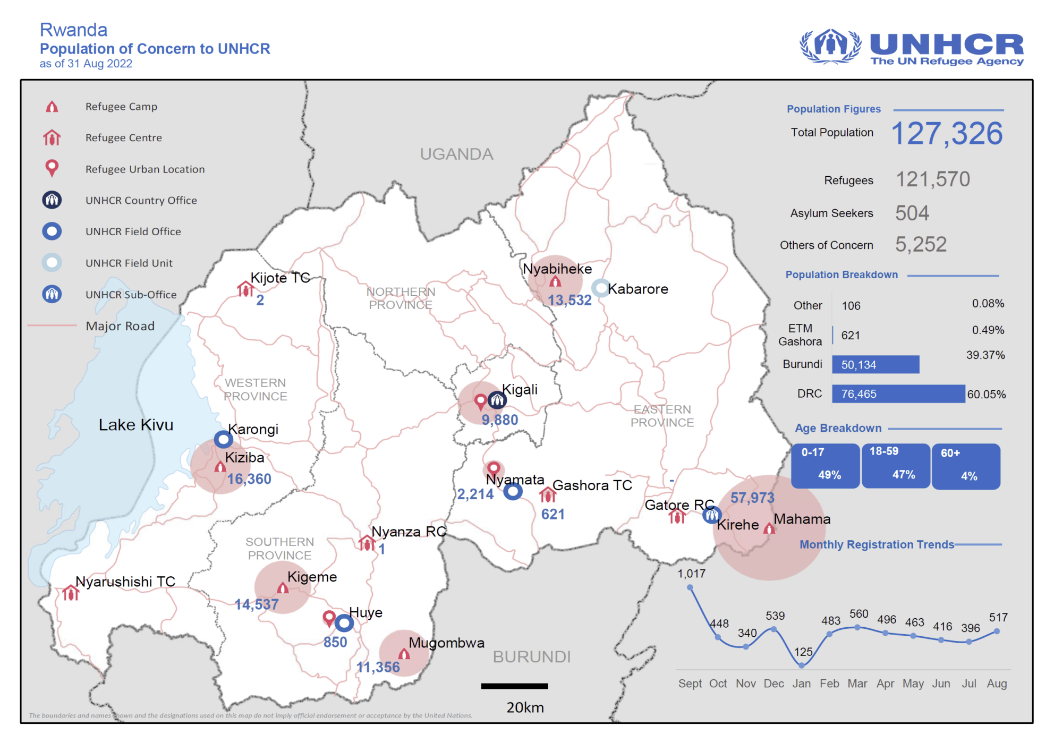

In [15]:
# what's the data submission status of each camp
df.groupby(['market']).agg(earliest_submission=('date', np.min), latest_submission=('date', np.max)).reset_index()
# Kigeme with 14,537 refugees
# Kiziba with 16,360 refugees
# Mahama with 57,973 refugees 
# Mugombwa with 11,356 refugees
# Nyabiheke with 13,532 refugees 
# Gihembe has been closed down (https://www.newtimes.co.rw/article/189410/News/gihembe-refugee-camp-to-be-closed-by-december)

,market,earliest_submission,latest_submission
0,Gihembe (Camp),2016-08-15,2021-10-15
1,Kigeme (Camp),2016-10-15,2022-10-15
2,Kiziba (Camp),2017-01-15,2022-10-15
3,Mahama (Camp),2018-05-15,2022-10-15
4,Mugombwa (Camp),2016-11-15,2022-10-15
5,Nyabiheke (Camp),2016-09-15,2022-10-15


In [16]:
# removing Gihembe camp as it is no longer operational
df = df[df.market != 'Gihembe (Camp)']

In [17]:
# let's confirm
df.market.unique()

array(['Nyabiheke (Camp)', 'Kigeme (Camp)', 'Mugombwa (Camp)',
       'Kiziba (Camp)', 'Mahama (Camp)'], dtype=object)

In [18]:
# sending the file to Emmanuel so he merge this data to other datasets. Also shared it with Tricart so he can check the 
# validity of the price column.
df.to_csv('data/clean_rw_food_prices.csv', index = False)

In [19]:
# checking for duplicates
df[df.duplicated()]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
